In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
import os



In [37]:

#os.chdir('2019-02-27_0020')
!pwd
!ls *npy


/home/jovyan/work/notebooks/data/d5f1f96849554e03aa98bed5aff36cf7/d5f1f96849554e03aa98bed5aff36cf7/data/contents
C_ss.npy	 Vg_cap_annual.npy  Vs_b_annual.npy    Vs_mw_annual.npy
time_mw.npy	 Vg_mw_annual.npy   Vsb_t_annual.npy   Vss_t_annual.npy
tL_mw.npy	 Vg_t_annual.npy    Vs_cap_annual.npy  Vs_t_annual.npy
Vg_b_annual.npy  Vm_t_annual.npy    Vs_dep.npy


In [38]:
#os.chdir('..')

In [39]:
#Load npy
C_ss=np.load('C_ss.npy')
time_mw=np.load('time_mw.npy')
tL=np.load('tL_mw.npy')
Vg_b_annual=np.load('Vg_b_annual.npy')
Vg_cap_annual=np.load('Vg_cap_annual.npy')
Vsb_t_annual=np.load('Vsb_t_annual.npy')
Vg_t_annual=np.load('Vg_t_annual.npy')
Vs_t_annual=np.load('Vs_t_annual.npy')

Vm_t_annual=np.load('Vm_t_annual.npy')


In [40]:
Vm_t_annual.shape #links in network, years (only < 20 should have values)

(440, 97)

In [41]:
# DHSVM model inputs
network_input ='streamfile_2km2_sauk.txt'
#Details from DHSVM Network model input
#    1  57     0.00107         750.00000   6      -1 SAVE "outlet"
#   19  53     0.00237        6368.37662  12       5 SAVE "12189500"
#  187  30     0.00546        4945.58441  12     147 SAVE "12187500"
#  224   7     0.01904        1722.79221  18     207 SAVE "12187000"
#  257  18     0.02688        1536.39610  18     255 SAVE "12186500"
        
#DHSVM network link
outlet=1
middlesauk=187   #Sauk River near Darrington NWISDV:12187500
lowersauk_dhsvmid=19  #Sauk River near Sauk NWISDV:12189500  PNNL-Python code link 20; (AML code link 19)
lowersauk_pnnl_area=20

#DHSVM network link - other locations
suiattleglacier=368
SaukaboveWhiteChuck=279  
SaukWhiteChuck=263
headwaters=260

DHSVMnetwork=pd.read_table(network_input)
area_o=DHSVMnetwork.total_ca_mean[outlet-1]/1000000
area_low=DHSVMnetwork.total_ca_mean[lowersauk_pnnl_area-1]/1000000
area_mid=DHSVMnetwork.total_ca_mean[middlesauk-1]/1000000
print(round(area_o,0))
print(round(area_low,0))
print(round(area_mid,0))

1905.0
1866.0
772.0


In [42]:
Vm_t_annual[outlet].shape

(97,)

In [43]:
#Calculate for entire network
#totaltransport=Vg_t_annual+Vs_t_annual+Vm_t_annual
#bedloadtransport=Vg_t_annual+Vsb_t_annual
#suspendedload=totaltransport-bedloadtransport

In [44]:
#List of all links in network for running sediment model
# DHSVM model output  - flow at each stream node
streamflow_input='Outflow.Only'
stream_columns=['Date',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439]
forcing_start_date=datetime.date(1915,1,1)
forcing_end_date=datetime.date(2011,12,31)

forcing_date_range=pd.date_range(forcing_start_date, forcing_end_date)
streamflow=pd.DataFrame(index=forcing_date_range, columns=stream_columns)
#streamflow.loc[forcing_date_range[0],:]=pd.read_table(streamflow_input, skiprows=[0,1], header=None,sep='\s+')
streamflow=pd.read_table(streamflow_input, skiprows=[0,1], header=None,sep='\s+')
streamflow.columns=stream_columns        
streamflow=streamflow.set_index('Date', drop=True)
streamflow.index = pd.to_datetime(streamflow.index)
streamflow
type(streamflow.index)
Qmod_median=streamflow.median(axis=0)

In [45]:
#evaluation_years_plot=np.arange(1915,2011) 
evaluation_years_plot=np.unique(streamflow.index.year)

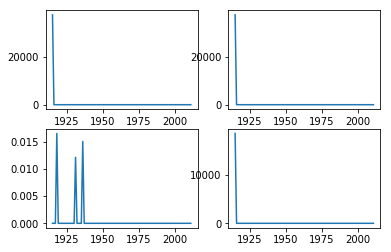

In [46]:
totaltransport_outlet=Vg_t_annual[outlet]+Vs_t_annual[outlet]+Vm_t_annual[outlet]
bedloadtransport_outlet=Vg_t_annual[outlet]+Vsb_t_annual[outlet]
suspendedload_outlet=totaltransport_outlet-bedloadtransport_outlet

fig = plt.figure()
ax = fig.add_subplot(221)
plt.plot(evaluation_years_plot,totaltransport_outlet)
ax = fig.add_subplot(222)
plt.plot(evaluation_years_plot,bedloadtransport_outlet)
ax = fig.add_subplot(223)
plt.plot(evaluation_years_plot,suspendedload_outlet)
ax = fig.add_subplot(224)
plt.plot(evaluation_years_plot,Vg_t_annual[outlet])

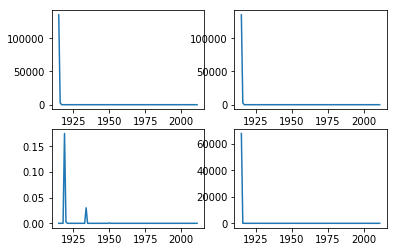

In [47]:
totaltransport_middlesauk=Vg_t_annual[middlesauk]+Vs_t_annual[middlesauk]+Vm_t_annual[middlesauk]
bedloadtransport_middlesauk=Vg_t_annual[middlesauk]+Vsb_t_annual[middlesauk]
suspendedload_middlesauk=totaltransport_middlesauk-bedloadtransport_middlesauk

fig = plt.figure()
ax = fig.add_subplot(221)
plt.plot(evaluation_years_plot,totaltransport_middlesauk)
ax = fig.add_subplot(222)
plt.plot(evaluation_years_plot,bedloadtransport_middlesauk)
ax = fig.add_subplot(223)
plt.plot(evaluation_years_plot,suspendedload_middlesauk)
ax = fig.add_subplot(224)
plt.plot(evaluation_years_plot,Vg_t_annual[middlesauk])

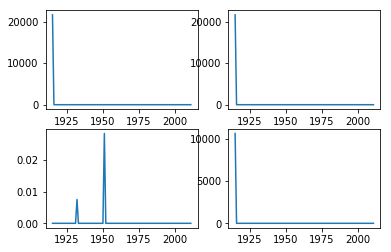

In [48]:
totaltransport_headwaters=Vg_t_annual[headwaters]+Vs_t_annual[headwaters]+Vm_t_annual[headwaters]
bedloadtransport_headwaters=Vg_t_annual[headwaters]+Vsb_t_annual[headwaters]
suspendedload_headwaters=totaltransport_headwaters-bedloadtransport_headwaters

fig = plt.figure()
ax = fig.add_subplot(221)
plt.plot(evaluation_years_plot,totaltransport_headwaters)
ax = fig.add_subplot(222)
plt.plot(evaluation_years_plot,bedloadtransport_headwaters)
ax = fig.add_subplot(223)
plt.plot(evaluation_years_plot,suspendedload_headwaters)
ax = fig.add_subplot(224)
plt.plot(evaluation_years_plot,Vg_t_annual[headwaters])

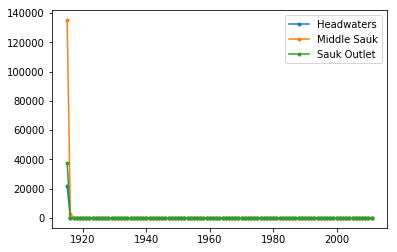

In [49]:
dict_s = {
    'Headwaters': totaltransport_headwaters,
    'Middle Sauk': totaltransport_middlesauk,
    'Sauk Outlet': totaltransport_outlet
}

for k, v in dict_s.items():
    plt.plot(evaluation_years_plot, v, '.-', label=k)
    # NOTE: changed `range(1, 4)` to mach actual values count
plt.legend()  # To draw legend
plt.show()

In [50]:
#Other plots Plot time series of years
# 2 x 2 Total transport
totaltransport
Vg_t_annual[outlet]
Vs_t_annual[outlet]
Vm_t_annual[outlet]

# 2 x 2 Bedload transport
totaltransport
bedloadtransport
Vg_t_annual
Vsb_t_annual

# 2 x 2 Suspended load
suspendedload
totaltransport
bedloadtransport
Vg_t_annual

NameError: name 'totaltransport' is not defined